In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import seaborn as sns

from scipy.stats import norm
from scipy.stats import uniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/store.csv")

In [4]:
rossmann_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/Rossmann Stores Data.csv")

<ipython-input-4-7481062493f3>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/Rossmann Stores Data.csv")


## Let's check sales_df

In [5]:
sales_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
sales_df.shape

(1115, 5)

In [7]:
sales_df.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
sales_df.describe(include= 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [10]:
# duplicate
len(sales_df[sales_df.duplicated()])

0

In [11]:
sales_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### As there are lots of NaN values in Promo2SinceWeek, Promo2SinceYear, PromoInterval, we will drop those columns.

In [12]:
cols_to_drop= ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [13]:
sales_df.drop(cols_to_drop, inplace= True, axis=1)

In [14]:
sales_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1


### As CompetitionDistance column contains less Null values, we wont remove that column. Rather we would replace those Null values.

<ipython-input-15-77d85202daf2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.CompetitionDistance)


<Axes: xlabel='CompetitionDistance', ylabel='Density'>

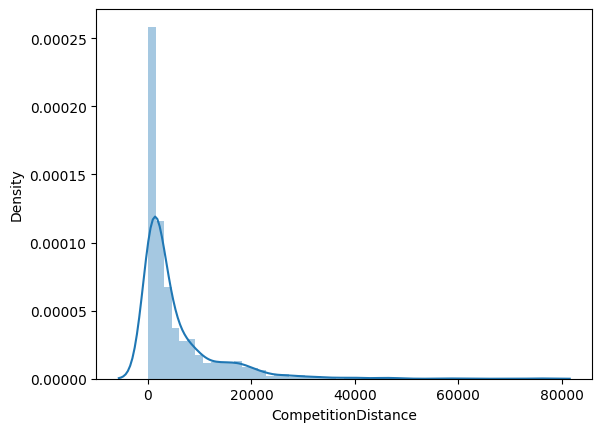

In [15]:
sns.distplot(sales_df.CompetitionDistance)

#### As the distribution is skewed here, it is wise to replace the Null values with Median.


In [17]:
sales_df['CompetitionDistance'].fillna(sales_df.CompetitionDistance.median(), inplace= True)

In [18]:
sales_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [29]:
sales_df.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

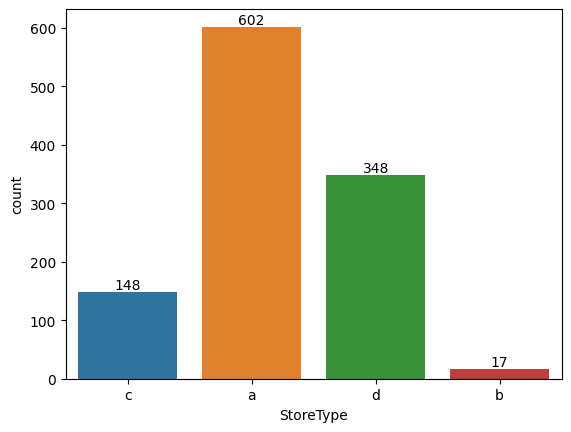

In [28]:
# Let's check the store type column.
fig= sns.countplot(x= 'StoreType', data= sales_df)

for i in fig.containers:
    fig.bar_label(i)

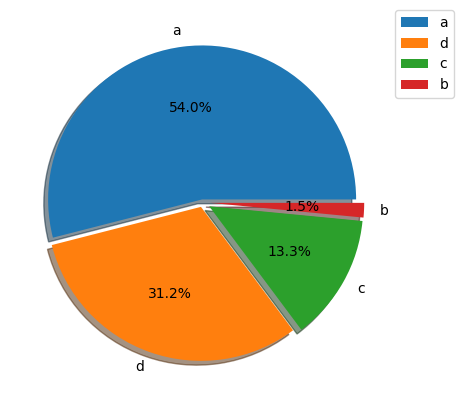

In [58]:
# Let's check it with a pie chart
plt.figure(figsize=(10,5))
explode= [0.02, 0.03, 0.05,0.05]
plt.pie(sales_df['StoreType'].value_counts(), labels= sales_df.StoreType.value_counts().index, startangle=0, autopct= '%1.1f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
plt.show()

## Here we can see that type-a store type is maximum i.e 54% in our data set followed by type-d i.e about 31%.

## While type-b store types is less comparatively.

In [ ]:
# Let's check the distribution of different store types.